# Feature Preprocessing

Goal: Find ways to encode te features to incorporate them into our model.

In [2]:
import pandas as pd
import numpy as np
import os

In [117]:
# Read the sample file
co_file = os.path.join("client_start_folder","Co_600K_Jul2019_6M.pkl")
df_co = pd.read_pickle(co_file)

In [12]:
df_co.head()

,AccountsAccountCategory,AccountsAccountRefDay,AccountsAccountRefMonth,CompanyCategory,CompanyId,CompanyName,CompanyNameCountNum,CompanyNameCountX,CompanyNameLen,CompanyNameWordLen,...,namechanged,namechanged2,oa11,oac1,oac11,oac2,oseast1m,osnrth1m,pcd,ru11ind
2993,TOTAL EXEMPTION FULL,31,3,Private Limited Company,352482,ATLANTIC BAY HOTEL (WOOLACOMBE) LIMITED,0,0,39,5,...,0,0,E00054910,5,5A1,5A,411310.0,421493.0,HX59DG,A1
3969,DORMANT,30,11,Private Limited Company,3477508,SUPERIOR PROPERTY INVESTMENTS LTD,0,0,33,4,...,0,0,E00166435,2,2C1,2C,392203.0,173252.0,SN153HR,C1
6752,TOTAL EXEMPTION FULL,30,11,Private Limited Company,1509998,GLP OLD STREET LIMITED,0,0,22,4,...,0,0,E00024130,2,2B2,2B,529221.0,181386.0,W1W8DW,A1
15331,TOTAL EXEMPTION FULL,31,12,Private Limited Company,410035,BAMFORD BROOK APARTMENTS LTD,0,0,28,4,...,0,0,E00025340,4,4A1,4A,378356.0,407292.0,M263WQ,A1
18593,TOTAL EXEMPTION FULL,28,2,Private Limited Company,915950,CREATIVE DIGITAL PRINTING SOLUTIONS LIMITED,0,0,43,5,...,0,0,E00149681,5,5A1,5A,399770.0,311242.0,WS117GB,A1


In [25]:
print(df_co.isnull().sum())

AccountsAccountCategory       0
AccountsAccountRefDay         4
AccountsAccountRefMonth       4
CompanyCategory               0
CompanyId                     0
                           ... 
oac2                          0
oseast1m                      0
osnrth1m                      0
pcd                           0
ru11ind                    8708
Length: 131, dtype: int64


In [5]:
print("   Column                         No of unique values")
for n,c in enumerate(df_co.columns):
    print("{:3d}. {:<35}: {:>6}".format(n,c, len(df_co[c].unique())))
    print("Number of nans: ", df_co[c].isnull().sum())
    print("type of data: ", type(df_co[c][0]))
    print()

   Column                         No of unique values
  0. AccountsAccountCategory            :     16
Number of nans:  0
type of data:  <class 'str'>

  1. AccountsAccountRefDay              :     32
Number of nans:  4
type of data:  <class 'str'>

  2. AccountsAccountRefMonth            :     13
Number of nans:  4
type of data:  <class 'str'>

  3. CompanyCategory                    :      2
Number of nans:  0
type of data:  <class 'str'>

  4. CompanyId                          : 600000
Number of nans:  0
type of data:  <class 'numpy.int64'>

  5. CompanyName                        : 600000
Number of nans:  0
type of data:  <class 'str'>

  6. CompanyNameCountNum                :     16
Number of nans:  0
type of data:  <class 'numpy.int64'>

  7. CompanyNameCountX                  :      5
Number of nans:  0
type of data:  <class 'numpy.int64'>

  8. CompanyNameLen                     :     85
Number of nans:  0
type of data:  <class 'numpy.int64'>

  9. CompanyNameWordLen         

To do list for dealing with features:

Ideas:

    - Drop company Id
    - Drop Company Number (unless it's easy to change)
    
To investigate:


    - CompanyName
    - All the FieldXXX which have more than 500 unique values
    - PreviousName_1CompanyName       
    - RegAddressAddressLine1          
    - RegAddressAddressLine2         
    - RegAddressCareOf                 
    - RegAddressCounty                
    - RegAddressPOBox                 
    - RegAddressPostCode               
    - RegAddressPostTown                                          
    - oa11: need more info on what it represents
    - pcd: need more info on what it represents           
    

Some other features are not numerical but have a small number of unique values and can therefore be encoded using standard techniques.

### Try removing problematic features for now 

In [118]:
zero_info_features = ["CompanyId", "CompanyNumber"]
only_one_value_features = ["Filled", "LimitedPartnershipsNumGenPartners", "LimitedPartnershipsNumLimPartners",\
                          "Status20190701"]

In [119]:
complicated_features = ["RegAddressAddressLine1", "RegAddressAddressLine2", "RegAddressCareOf", "RegAddressCounty", \
                        "RegAddressPOBox", "RegAddressPostCode", "RegAddressPostTown", "pcd", "oa11", "PreviousName_1CompanyName"]

In [190]:
df_curated = df_co.drop(zero_info_features + only_one_value_features + complicated_features, axis=1)

### Encoding the categorical data

In [70]:
import numbers

In [178]:
def is_numeric(column):
    i = 0
    while i < len(column) and column[i] is None:
        i += 1
    if i == len(column):
        return "Cannot infer"
    return isinstance(column[i], numbers.Number)

In [177]:
def extract_categorical_feature_names(df):
    return [col for col in df if not is_numeric(df[col].values)]

In [203]:

df_curated["ru11ind"].unique()

array(['A1', 'C1', 'D2', 'F1', 'B1', 'D1', 'E1', 'F2', 'C2', 'nan', '1.0',
       '1', '2', '2.0', '4', '3.0', '8', '6', '7.0', 'E2', '6.0', '7',
       '3', '5', '4.0', '8.0'], dtype=object)

In [191]:
# modifies df
def convert_col_to(df, to_cols, func):
    for col in to_int_cols:
        df[col] = df[col].apply(lambda x: func(x) if x is not None else None)

In [192]:
to_int_cols = ["AccountsAccountRefDay", "AccountsAccountRefMonth", "oac1"]
convert_col_to(df_curated, to_int_cols, int)

In [194]:
# Change None to string 'Nan' so that it is encoded with sklearn LabelEncoder
for cat in extract_categorical_feature_names(df_curated):
    df_curated[cat] = df_curated[cat].apply(lambda x: 'Nan' if x is None else x)

In [195]:
convert_col_to(df_curated, ["ru11ind"], str)

In [196]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [204]:
cat_features = extract_categorical_feature_names(df_curated)
encoded_data = pd.concat([df_curated.drop(cat_features, axis=1), df_curated[cat_features].apply(le.fit_transform)], axis=1)

In [233]:
encoded_data['cty']

2993       26
3969       26
6752       26
15331      26
18593      20
           ..
3195120     8
929546      0
2794558    26
1475053    26
3145186    13
Name: cty, Length: 600000, dtype: int32

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, Pool
import seaborn as sns

In [262]:
## we'll use all the features
X, y = encoded_data.drop('isfailed',axis = 1), encoded_data['isfailed'].values


In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=2020)
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)

In [265]:
cbr = CatBoostClassifier(n_estimators=100, max_depth=3,random_state=2019, cat_features=cat_features)
cbr.fit(train_pool)

Learning rate set to 0.5
0:	learn: 0.0485161	total: 185ms	remaining: 18.3s
1:	learn: 0.0185265	total: 302ms	remaining: 14.8s
2:	learn: 0.0132275	total: 472ms	remaining: 15.3s
3:	learn: 0.0126001	total: 560ms	remaining: 13.4s
4:	learn: 0.0117578	total: 719ms	remaining: 13.7s
5:	learn: 0.0114321	total: 814ms	remaining: 12.7s
6:	learn: 0.0112715	total: 904ms	remaining: 12s
7:	learn: 0.0112463	total: 1.01s	remaining: 11.6s
8:	learn: 0.0111725	total: 1.12s	remaining: 11.4s
9:	learn: 0.0111700	total: 1.23s	remaining: 11.1s
10:	learn: 0.0110955	total: 1.33s	remaining: 10.8s
11:	learn: 0.0110437	total: 1.43s	remaining: 10.5s
12:	learn: 0.0109278	total: 1.54s	remaining: 10.3s
13:	learn: 0.0108713	total: 1.64s	remaining: 10.1s
14:	learn: 0.0108086	total: 1.73s	remaining: 9.82s
15:	learn: 0.0108033	total: 1.84s	remaining: 9.64s
16:	learn: 0.0107211	total: 1.92s	remaining: 9.4s
17:	learn: 0.0106744	total: 2.03s	remaining: 9.23s
18:	learn: 0.0106694	total: 2.13s	remaining: 9.08s
19:	learn: 0.010633

In [266]:
print(f"Accuracy - Train: {accuracy_score(y_train, cbr.predict(train_pool))}")
print(f"Accuracy - Test: {accuracy_score(y_test, cbr.predict(test_pool))}")

Accuracy - Train: 0.9981104166666667
Accuracy - Test: 0.9981916666666667


In [271]:
cbr.predict(test_pool).sum()

15

C:\Users\oscar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

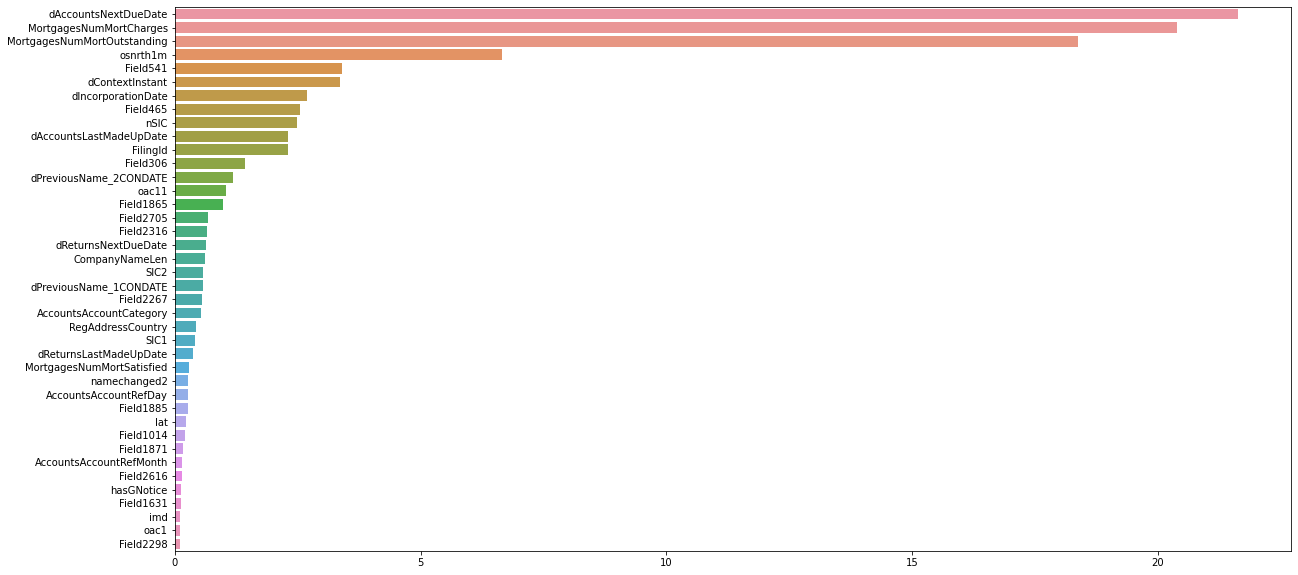

In [274]:
fig, ax = plt.subplots(figsize=(20,10))
sorted_feature_importance = list(sorted(zip(cbr.get_feature_importance(), X.columns), key=lambda k: k[0], reverse=True))
sorted_feature_importances, sorted_features = map(list,zip(*sorted_feature_importance))
top_n = 40
sns.barplot(sorted_feature_importances[:top_n], sorted_features[:top_n])